In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
crime = pd.read_csv("/content/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [5]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
#import minmax module
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = crime.iloc[:,1:5]

In [7]:
norm = MinMaxScaler()

In [8]:
norm.fit(data)

MinMaxScaler()

In [9]:
MinMaxScaler()

MinMaxScaler()

In [10]:
norm_data = norm.transform(data)
print(norm_data)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

In [11]:
type(norm_data)

numpy.ndarray

Hierarchical Clustering

In [13]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [14]:
hier = linkage(norm_data,method="complete",metric="euclidean")

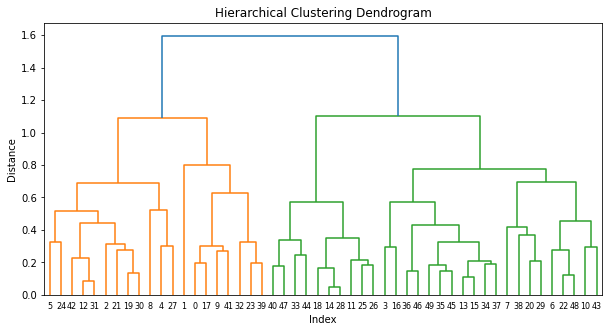

In [15]:
plt.figure(figsize=(10,5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(hier,leaf_rotation=0.,leaf_font_size=8.)
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
h_comp = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(norm_data)

In [18]:
cluster_labels= pd.Series(h_comp.labels_)

In [19]:
data['clust']=cluster_labels

In [20]:
cl1 = data.iloc[:,1:12].groupby(data.clust).median()
cl1

,Assault,UrbanPop,Rape,clust
clust,,,,
0,254.5,70.0,27.35,0.0
1,132.5,70.0,18.40,1.0
2,82.0,52.0,11.25,2.0
